In [2]:

## Random projections of high-dimensional data
# for database example: digits
# Jan Nagler (adapted, Rosebrock), April 21
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # works
#warnings.filterwarnings(action='once') #does not work

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# dataset from the below source
#Fang Zhou, Claire Q and Ross. D. King
#Predicting the Geographical Origin of Music, ICDM, 2014<br>

In [3]:
sound = np.genfromtxt('audio_track.csv', delimiter=',')

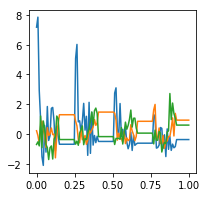

In [4]:
X_sound = sound[:,:-2]
Y_sound = sound[:,-1]
plt.figure(1, figsize=(3, 3))
time = np.linspace(0,1,114)
plt.plot(time,X_sound[:3,:].T)
plt.show()

this paragraph show the first three lines in different colors

In [5]:
split = train_test_split(X_sound, Y_sound, test_size = 0.3,
    random_state = 11)
(trainData, testData, trainTarget, testTarget) = split

In [6]:
# Print what the theory says for k, given an eps(ilon)
# for n=1797 images, dimension d=8x8=64 (digits)
print ("Professors Johnson and Lindenstrauss say: k >=", johnson_lindenstrauss_min_dim(1059,eps=0.1))

Professors Johnson and Lindenstrauss say: k >= 5970


#### first try with linear model 

In [7]:
model = LinearSVC()
model.fit(trainData, trainTarget)
baseline = metrics.accuracy_score(model.predict(testData), testTarget)
accuracies = []
dims = np.int32(np.linspace(2, 114, 20))

In [8]:
# Loop over the projection sizes, k
for dim in dims:
    # Create random projection
    sp = SparseRandomProjection(n_components = dim)
    X = sp.fit_transform(trainData)
 
    # Train classifier of your choice on the sparse random projection
    model = LinearSVC()
    model.fit(X, trainTarget)
 
    # Evaluate model and update accuracies
    test = sp.transform(testData)
    accuracies.append(metrics.accuracy_score(model.predict(test), testTarget))

In [9]:
accuracies

[0.08490566037735849,
 0.14465408805031446,
 0.24213836477987422,
 0.3050314465408805,
 0.2830188679245283,
 0.34276729559748426,
 0.3584905660377358,
 0.33647798742138363,
 0.33647798742138363,
 0.33962264150943394,
 0.36477987421383645,
 0.39308176100628933,
 0.3742138364779874,
 0.389937106918239,
 0.3710691823899371,
 0.3867924528301887,
 0.3742138364779874,
 0.3805031446540881,
 0.37735849056603776,
 0.39937106918238996]

the arrucay is not very good, so another model is tried 

In [11]:
# use another model2
from sklearn.ensemble import RandomForestClassifier
import math

model= RandomForestClassifier(n_estimators=1000,max_features=114, max_depth=None,min_samples_split=2, bootstrap=True)

model.fit(trainData, trainTarget)
area2_predict = model.predict(testData) 
metrics.accuracy_score(area2_predict,testTarget)

array([20., 27.,  5., 12., 20., 26., 28., 30., 12., 14., 13., 12., 15.,
       21., 31., 23., 21., 21.,  0., 21.,  6., 30., 27., 14., 27., 29.,
       21., 28., 29.,  4.,  4., 21.,  6., 17., 17., 14.,  0., 31., 31.,
       24., 23., 23.,  4., 14., 11., 23., 25., 16., 13., 10., 13., 28.,
       16., 20.,  0., 14., 12., 27., 22., 19., 11., 14.,  1., 12.,  0.,
       13., 27., 24., 14., 19., 11.,  0., 26., 13., 20.,  1., 25., 27.,
       22., 12., 24., 22.,  6., 32., 20., 14.,  6., 28., 23., 20.,  4.,
       12.,  6., 29., 10., 25., 28., 31.,  8., 32., 13., 14., 30., 13.,
       29., 19., 30., 21.,  0., 27.,  5., 32., 14., 12., 22., 22., 21.,
       12.,  6.,  0., 16., 16., 11., 16., 30.,  0., 22., 16.,  6.,  7.,
        5.,  0., 24.,  6., 32., 21., 28.,  6., 16.,  0., 14., 26., 22.,
       14., 24., 22., 28., 27., 23., 14.,  7., 14., 13., 21., 14., 20.,
        7., 29.,  7., 15., 25., 20., 16., 28.,  8., 14.,  6., 11., 14.,
       12., 31., 23., 20., 25., 28., 24., 31., 31., 30., 27.,  1

In [13]:
metrics.accuracy_score(area2_predict,testTarget)

0.4968553459119497

the accuracy is not high as well,due to time limitation, we will currently stop trying.

In [ ]:
# use another model1
accracies = []

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
for dim in dims :
    sp = SparseRandomProjection(n_components = dim)
    X = sp.fit_transform(trainData)
    
    model = buildSequentialModel()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    model.fit(trainData, trainTarget, 
          batch_size=80, 
          epochs=10, 
          verbose=1,
          #optimizer = my_optimizer,
          validation_data=(testData, testTarget))
    
    test = sp.transform(testData)
    score = model.evaluate(X_test, Y_test, verbose=1)
    accuracies.append(metrics.accuracy_score(kmeans.predict(test), testTarget))

In [ ]:
# Create figure
plt.figure()
plt.xlabel("# of dimensions k")
plt.ylabel("Accuracy")
plt.xlim([2, 114])
plt.ylim([0, 1])
 
# Plot baseline and random projection accuracies
plt.plot(dims, [baseline] * len(accuracies), color = "r")
plt.plot(dims, accuracies)

plt.show()